In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression
from tqdm.keras import TqdmCallback

#Data Import
df = pd.read_csv('auto-mpg-clean.csv', encoding= 'unicode_escape')
X, y = df.drop(['mpg'], axis =1), df['mpg']
X = (X-X.min())/(X.max()-X.min())

def coeff_determination(y, yhat):
    """Calculates R2"""
    from keras import backend as K
    SS_res = K.sum(K.square(y-yhat))
    SS_tot = K.sum(K.square(y -K.mean(yhat)))
    return (1-SS_res/(SS_tot + K.epsilon()))

def r2_adjusted(x, r2):
    """Calculates R2 Adjusted """
    #no. instances, params
    m, n = x.shape
    #calculate r_df
    r_df = (m-1)/(m-n)
    return 1-(r_df*(1-r2))
              
def ThreeL_NN(num_feat, act, epoch, learnrate):
    """ Creates the Sequential Model as dataset has one output, inputs are placed in the model
    followed by 1 hidden layer and then output layer. The optimizer used for the NN is Adam.
    A plot of MSE vs Epochs and R2 vs Epochs is printed at the end. R2, R2 Bar and R2 CV are returned.
    """
    model = Sequential()
    model.add(Input(shape=(num_feat,)))
    model.add(Dense(units=24, activation=act))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learnrate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', coeff_determination])
    fit_model = model.fit(x=x_train, y=y_train, epochs=epoch, batch_size=32, validation_split=0.2, verbose=0, callbacks=[TqdmCallback()])
    plt.clf()
    plt.plot([i for i in range(epoch)], fit_model.history['mse'], label="mse")
    plt.title(f"{act}: {learnrate}")
    plt.legend()
    plt.show()
    plt.plot([i for i in range(epoch)], fit_model.history['coeff_determination'], label="R2")
    plt.legend()
    return (fit_model.history['coeff_determination'][-1], r2_score(y_test, model(x_test)), r2_adjusted(x_train,fit_model.history['coeff_determination'][-1]))

# 3 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

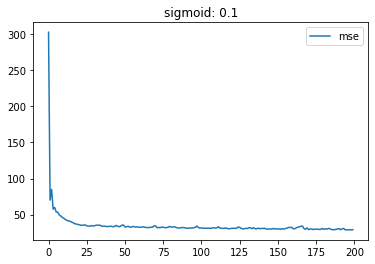

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

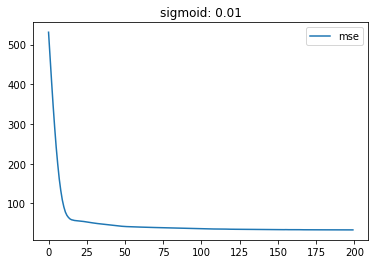

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

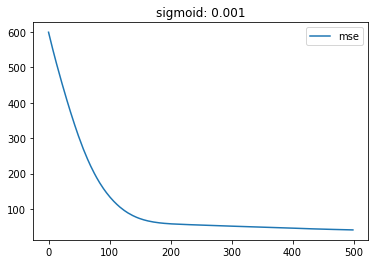

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

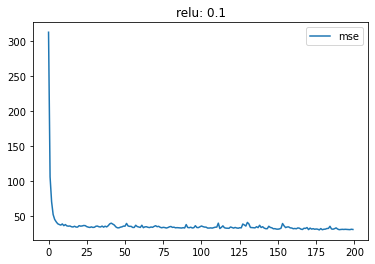

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

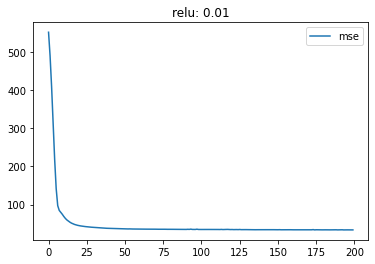

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

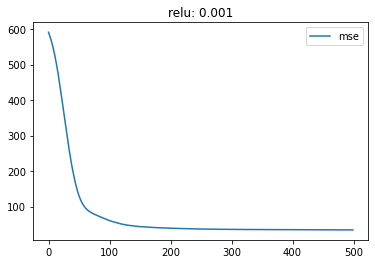

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

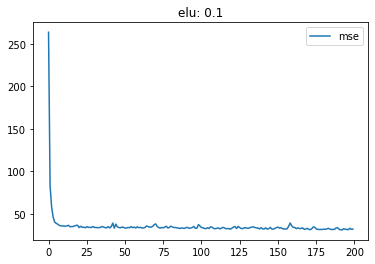

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

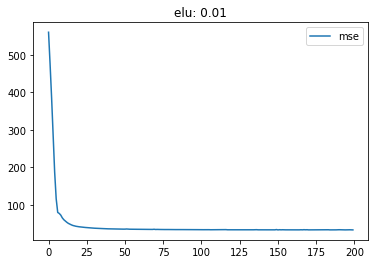

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

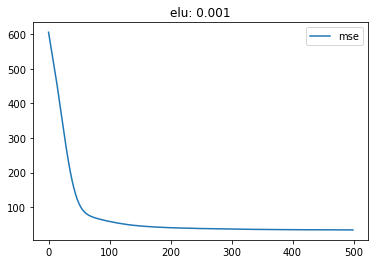

,Learning Rate,R2,R2 CV,R2 Adjusted
sigm,0.100,0.417954,0.193671,0.406274
sigm,0.010,0.386554,0.148499,0.374244
sigm,0.001,0.264841,0.452721,0.250089
relu,0.100,0.429974,0.245626,0.418535
relu,0.010,0.354725,-0.080202,0.341776
relu,0.001,0.320140,-0.147205,0.306497
elu,0.100,0.383681,0.110025,0.371314
elu,0.010,0.365806,-0.051236,0.353080
elu,0.001,0.341932,-0.014896,0.328726


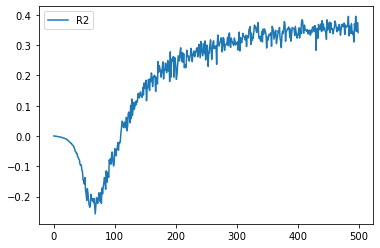

In [2]:
#Splitting datset into training and testing sets (80/20 split)
x_train, y_train = X[-306:].to_numpy(), (y[-306:]).to_numpy()
x_test, y_test   = X[:-306].to_numpy(), (y[:-306]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = ThreeL_NN(7, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = ThreeL_NN(7, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = ThreeL_NN(7, 'sigmoid', 500, 0.001)

relu1, relu_cv1, relu_bar1 = ThreeL_NN(7, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = ThreeL_NN(7, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = ThreeL_NN(7, 'relu', 500, 0.001)

elu1, elu_cv1, elu_bar1 = ThreeL_NN(7, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = ThreeL_NN(7, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = ThreeL_NN(7, 'elu', 500, 0.001)

#Output
R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])
R2s

# Forward 3 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

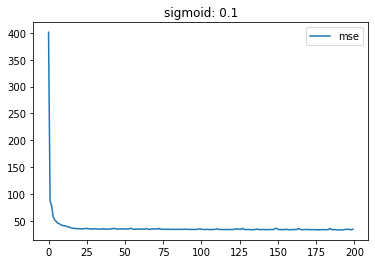

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

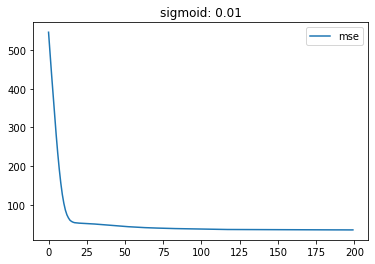

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

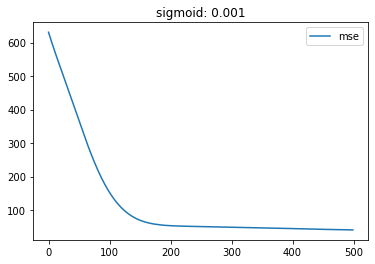

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

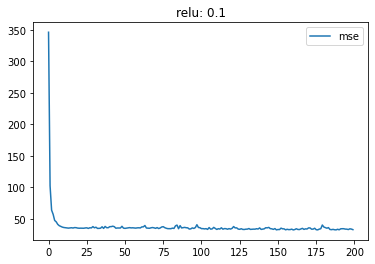

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
#Selecting features to feed the NN with forward selection and splitting training and testing sets (80/20)
reg = LinearRegression() 
sfs = SequentialFeatureSelector(estimator=reg)
sfs.fit(X,y)
forward = sfs.transform(X)
x_train, y_train = forward[-306:], (y[-306:]).to_numpy()
x_test, y_test   = forward[:-306], (y[:-306]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = ThreeL_NN(3, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = ThreeL_NN(3, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = ThreeL_NN(3, 'sigmoid', 500, 0.001)

relu1, relu_cv1, relu_bar1 = ThreeL_NN(3, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = ThreeL_NN(3, 'relu', 450, 0.01)
relu3, relu_cv3, relu_bar3 = ThreeL_NN(3, 'relu', 200, 0.001)

elu1, elu_cv1, elu_bar1 = ThreeL_NN(3, 'elu', 500, 0.1)
elu2, elu_cv2, elu_bar2 = ThreeL_NN(3, 'elu', 500, 0.01)
elu3, elu_cv3, elu_bar3 = ThreeL_NN(3, 'elu', 200, 0.001)

#Output
forward_R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])

forward_R2s